In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For better plots
%matplotlib inline
sns.set(style='whitegrid')


In [185]:
# Replace with your dataset path
df = pd.read_csv(r"C:\Users\priya\Downloads\Employee-Attrition.csv")

# Preview data
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [187]:
# Check dataset shape
print("Shape of data:", df.shape)

# General info
df.info()

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Drop columns that are constant or not useful
df.drop(columns=['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], inplace=True)


Shape of data: (1470, 35)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14

In [189]:
# Summary statistics for numerical features
df.describe()

# Value counts for categorical features
categorical_columns = df.select_dtypes(include='object').columns
for col in categorical_columns:
    print(f"\n{col}:\n", df[col].value_counts())



Attrition:
 Attrition
No     1233
Yes     237
Name: count, dtype: int64

BusinessTravel:
 BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

Department:
 Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

EducationField:
 EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

Gender:
 Gender
Male      882
Female    588
Name: count, dtype: int64

JobRole:
 JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64

MaritalStatus:
 MaritalStatus
Ma

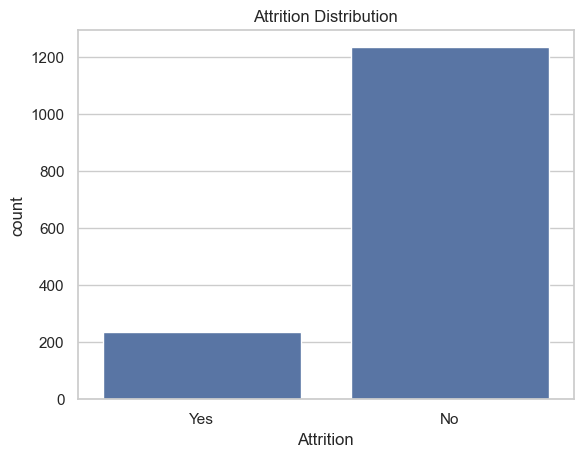

In [191]:
sns.countplot(data=df, x='Attrition')
plt.title("Attrition Distribution")
plt.show()


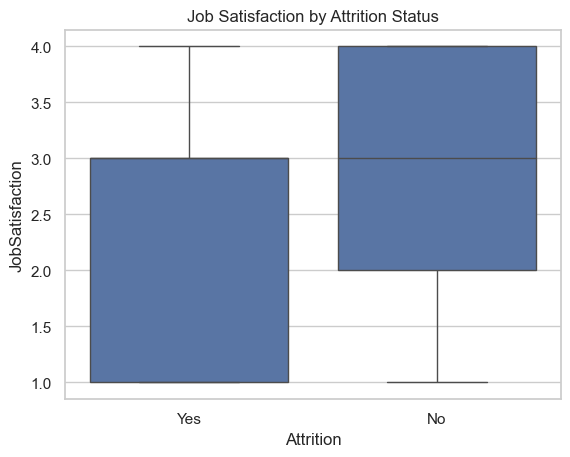

In [193]:
sns.boxplot(x='Attrition', y='JobSatisfaction', data=df)
plt.title("Job Satisfaction by Attrition Status")
plt.show()


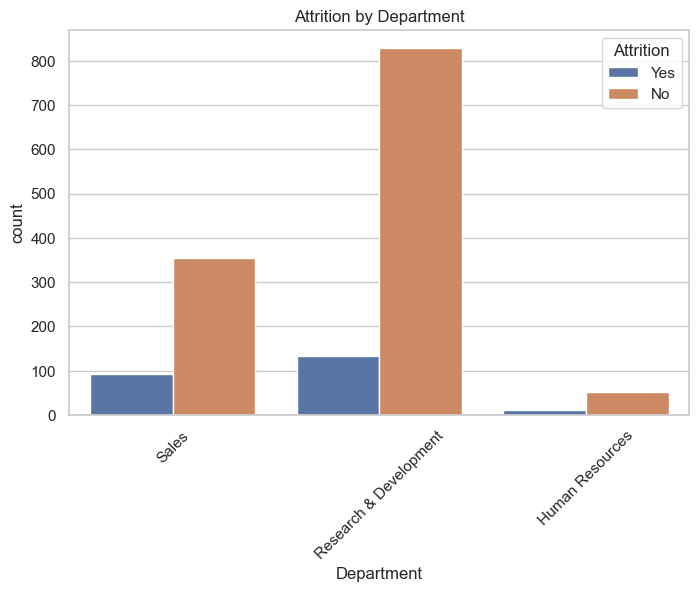

In [195]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Department', hue='Attrition')
plt.title("Attrition by Department")
plt.xticks(rotation=45)
plt.show()


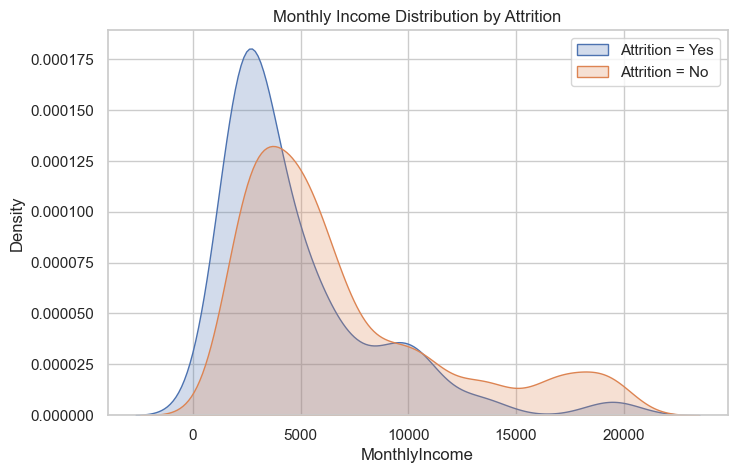

In [197]:
plt.figure(figsize=(8,5))
sns.kdeplot(data=df[df['Attrition'] == 'Yes']['MonthlyIncome'], label='Attrition = Yes', fill=True)
sns.kdeplot(data=df[df['Attrition'] == 'No']['MonthlyIncome'], label='Attrition = No', fill=True)
plt.title('Monthly Income Distribution by Attrition')
plt.legend()
plt.show()


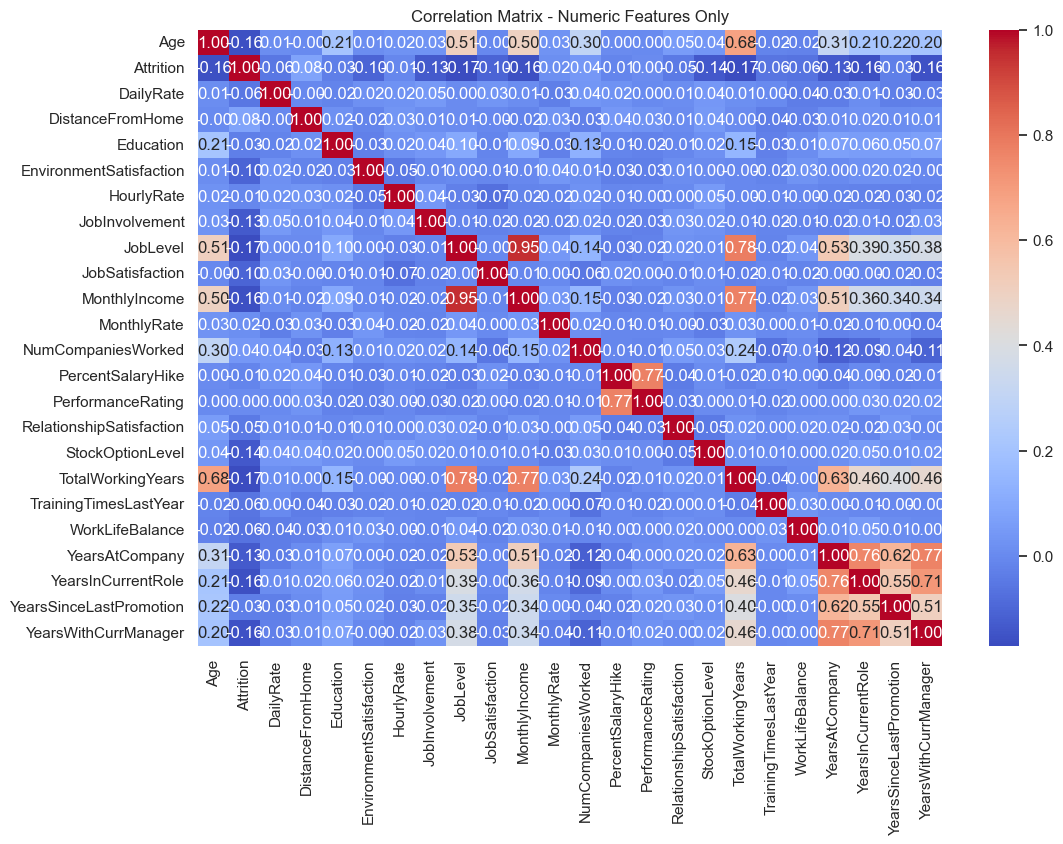

In [199]:
# Encode target for correlation
df_encoded = df.copy()
df_encoded['Attrition'] = df_encoded['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

# Select only numeric columns
numeric_df = df_encoded.select_dtypes(include=[np.number])

# Correlation matrix
plt.figure(figsize=(12, 8))
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix - Numeric Features Only")
plt.show()


In [203]:
df.to_csv("cleaned_employee_data.csv", index=False)
print("Cleaned data saved successfully.")


Cleaned data saved successfully.


In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import joblib

In [207]:
# Load dataset
df = pd.read_csv(r"C:\Users\priya\Downloads\Employee-Attrition.csv" )

# Drop columns with constant or identifier values
df.drop(['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'], axis=1, inplace=True)

from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Apply Label Encoding to the 'Attrition' column
df['Attrition'] = le.fit_transform(df['Attrition'])

# Apply One-Hot Encoding to categorical columns
df_encoded = pd.get_dummies(df, drop_first=True)



# Encode target
df['Attrition'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

# Encode categorical columns
categorical_cols = df.select_dtypes(include='object').columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
# Save the encoded DataFrame to a CSV file
    df_encoded.to_csv("encoded_employee_data.csv", index=False)


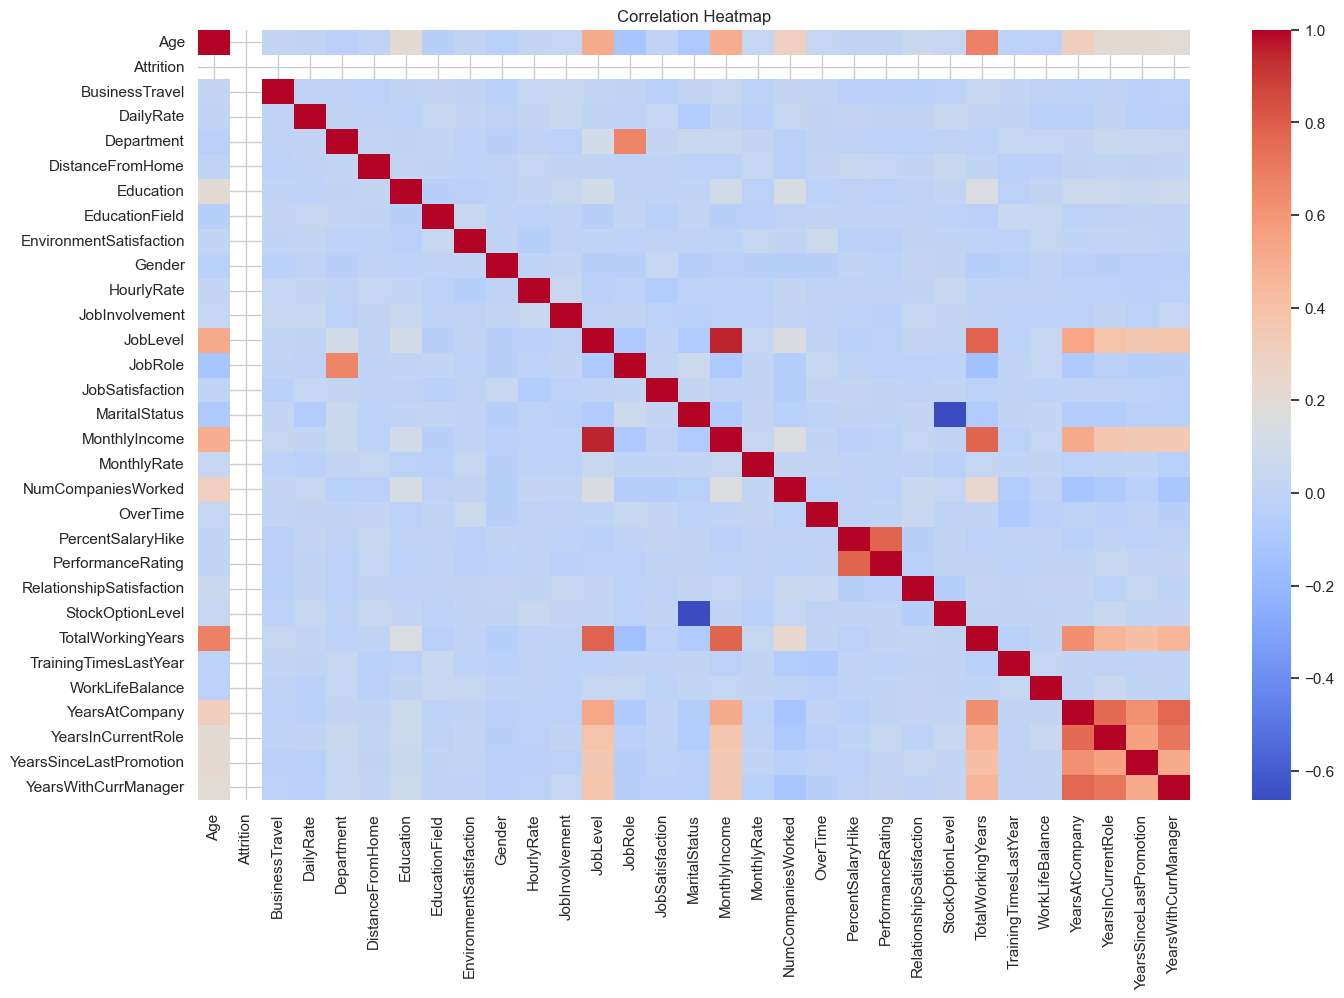

In [209]:
plt.figure(figsize=(16,10))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()


Accuracy Score: 0.8571428571428571
Accuracy Score: 0.8571428571428571
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       255
           1       0.38      0.13      0.19        39

    accuracy                           0.86       294
   macro avg       0.63      0.55      0.56       294
weighted avg       0.81      0.86      0.82       294



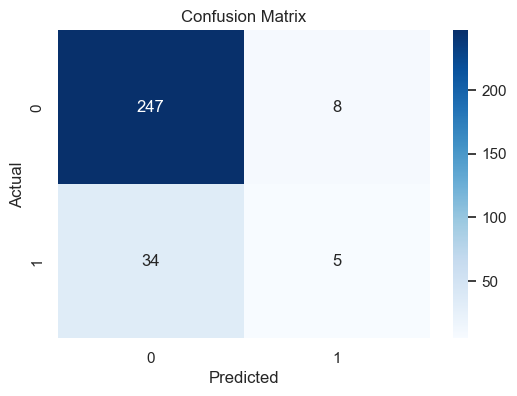

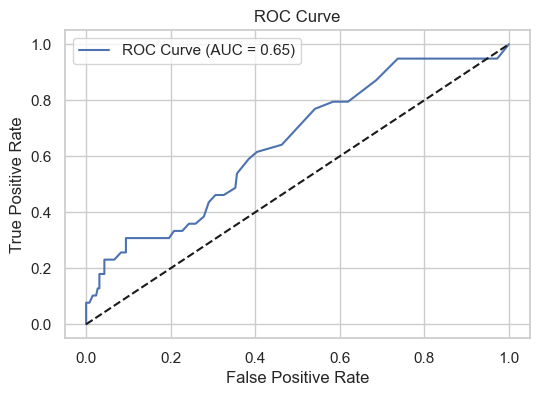

In [210]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv(r"C:\Users\priya\Downloads\Employee-Attrition.csv")  # Replace with your actual file

# ✅ Convert 'Attrition' column from 'Yes'/'No' to 1/0
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# ✅ Select features and target
selected_features = ['Age', 'DistanceFromHome', 'MonthlyIncome', 'JobSatisfaction', 'YearsAtCompany']
X = df[selected_features]
y = df['Attrition']

# ✅ Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# ✅ Make predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]
print("Accuracy Score:", accuracy_score(y_test, y_pred))
# ✅ Make predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# ✅ Accuracy
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# ✅ Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))


# ✅ Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ✅ ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc_score(y_test, y_prob)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()




In [211]:
import joblib

# Save model
joblib.dump(model, "employee_attrition_model.pkl")

# Save the list of feature columns
joblib.dump(selected_features, "model_features.pkl")


['model_features.pkl']